# CE9010 Introduction To Data Analysis

## Group 3

Student Name  |  Matric No  
:-:|:-:
Say Yueyang, Symus|U1922016K   
He Zeqing|U1722721G
Kwek Yan Qing|U1740743J   

---

# Background

Haze is one major form of air pollution that Singaporeans face annually. The presence of haze is attributed to the forest fires in Sumatra, Indonesia. Due to the increase in demand of commercial crops, Indonesian farmers have resorted to shifting agriculture, which includes the large-scale slash-and-burn of forest land to produce fertile planting grounds. The resulting air pollution is then spread across the region by the climatic phenomenon El Nino, enveloping Singapore in a blanket of haze and affecting the overall health of Singaporeans. In 2020, Indonesia fires torched approximately 207,000 hectares of forests from January to September. While the area is smaller compared to previous years, the burning resulted in a US$5.2 billion cost towards the Indonesian economy, and the occurrence of toxic smog over the city.

**References:**
- [Haze Pollution](https://eresources.nlb.gov.sg/infopedia/articles/SIP_2013-08-30_185150.html#:~:text=Forest%20fires%20in%20Sumatra%2C%20Indonesia,of%20the%20haze%20in%20Singapore.&text=Strong%20winds%20during%20the%20southwest,such%20fires%20throughout%20Southeast%20Asia.)
- [Commentary: Little smoke this haze season – but fires rage on in Indonesia](https://www.channelnewsasia.com/news/commentary/indonesia-forest-fire-peat-haze-palm-oil-jokowi-omnibus-bill-13533700)

# Objective

The objective of our study is to predict the possible intensity of future hotspots in South East Asia, including Indonesia.
Hopefully, this study will be able to support further research in estimating the possibility and severity of the occurrences of haze in Singapore.

Our study will be conducted with the relevant data on forest fires in South East Asia. Our dataset is obtained from the National Aeronautics and Space Administration (NASA)'s Fire Information for Resource Management System (FIRMS). It contains both geographical and technical data extracted from the Visible Infrared Imaging Radiometer Suite (VIIRS) sensor aboard their NOAA-20 weather satellite.

The table below describes each data available in our dataset:

| Data | Description |
| -: | :- |
| latitude | Indicates the latitude of fire pixel. |
| longitude	| Indicates the longitude of fire pixel. |
| bright_ti4 | Indicates the VIIRS I-4 Channel brightness temperature of the fire pixel. |
| scan | Indicates the  Along Scan pixel size. |
| track	| Indicates the Along Track pixel size.  |
| acq_date | Indicates the date of the acquired data. |
| acq_time | Indicates the time of the acquired data. |
| satellite | Indicates if the scan was done by the satellite (boolean values). |
| confidence | Indicates the confidence level of the data collected. |
| version | Indicates the version and source of data processing. |
| bright_ti5 | Indicates the VIIRS I-5 Channel brightness temperature of the fire pixel. |
| frp | Indicates the Fire Radiative Power (Detected thermal strength of the fire). |
| daynight | Indicates whether if it's daytime fire or nighttime fire. |

**References:**
- [Fire Information for Resource Management System](https://firms2.modaps.eosdis.nasa.gov/)
- [Visible Infrared Imaging Radiometer Suite](https://en.wikipedia.org/wiki/Visible_Infrared_Imaging_Radiometer_Suite)
- [Attribute Fields](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/v1-vnp14imgt#ed-viirs-375m-attributes)

---

# Table of Contents

1. [Setup](#1-|-Setup)
2. [Dataset Summaries](#2-|-Dataset-Summaries)
3. [Exploratory Data Analysis/Visualization](#3-|-Exploratory-Data-Analysis/Visualization)
4. [Data Pre-Preprocessing](#4-|-Data-Pre-Processing)
5. [Data Analysis - Supervised Learning Models](#5-|-Data-Analysis---Supervised-Learning-Models)
6. [Model Comparison](#6-|-Comparison-between-Models)

# 1 | Setup 

## 1.1 | Setup on Anaconda Prompt/local computer

1. Ensure that the environment.yml file accompanying this notebook is located in the same directory as the notebook. <br>
2. Open Anaconda Prompt, and in Anaconda Prompt, navigate to the directory where the notebook was downloaded. <br>
3. In Anaconda Prompt, enter the following line of code:
> conda env create -f environment.yml

4. In Anaconda Prompt, enter the following line of code:
> conda info --envs

If installation of the environment is successful, you will see the environment 'CE9010_2021_Group3' listed in the list of environments.

5. Activate the notebook: 
> conda activate CE9010_2021_Group3

6. Run Jupyter Notebook 
> jupyter notebook

7. Launch the notebook: group3_notebook_CE9010_2021

## 1.2 | Import modules
Run this to import all the modules required. Make sure that the imports have no errors before proceeding, else, the installation steps may need to be reset and repeated.

In [ ]:
# Import required modules
import os
try:
    import pandas as pd
    import plotly.express as px
    from matplotlib import pyplot as plt
    from IPython.display import IFrame,Image
    import seaborn as sns
    import numpy as np
    import imageio
    import geopandas as gpd
    print ("All modules imported successfully.")
except ImportError:
    print ("One or more modules not imported!")
    print ("Please check that all dependencies are installed.")

# Directory to store local content for loading of interactive images
if not os.path.exists("content"):
    os.mkdir("content")
# Clean up past images
else:
    for f in os.listdir('./content'):
        os.remove(os.path.join('content', f))

All modules imported successfully.


In [ ]:
#this is a class used later to block printing of functions. 
#for blocking of prints
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

with HiddenPrints():
    print("This will not be printed")

print("This will be printed as before")

This will be printed as before


# 2 | Dataset Summaries 

In [ ]:
# Data Acquisition
# Import data from the Active Fire Dataset, VIIRS 375m / NOAA-20
raw_data = pd.read_csv("https://firms2.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/csv/J1_VIIRS_C2_SouthEast_Asia_7d.csv",sep=',')
print (raw_data.shape) # dimensions
raw_data[:5]

(46468, 13)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,330,1,nominal,2.0NRT,283.7,4.5,D
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,330,1,nominal,2.0NRT,293.1,2.1,D
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,330,1,nominal,2.0NRT,289.9,3.5,D
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,330,1,nominal,2.0NRT,287.4,4.6,D
4,-5.79334,120.50307,331.2,0.47,0.40,2021-04-06,512,1,nominal,2.0NRT,293.9,2.1,D


In [ ]:
# Check dataset
raw_data.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,satellite,bright_ti5,frp
count,46468.000000,46468.000000,46468.000000,46468.000000,46468.000000,46468.000000,46468.0,46468.000000,46468.000000
mean,19.395482,100.275244,335.725192,0.457056,0.463575,816.735388,1.0,298.343335,14.771012
std,5.555385,7.624591,15.697886,0.079358,0.110654,428.967330,0.0,8.077464,33.017482
min,-11.497810,88.014530,207.900000,0.320000,0.360000,254.000000,1.0,248.600000,0.000000
25%,16.204757,94.596418,332.100000,0.400000,0.370000,624.000000,1.0,293.200000,3.100000
50%,20.025620,97.445675,337.000000,0.440000,0.420000,648.000000,1.0,298.700000,5.800000
75%,23.723647,105.129452,343.400000,0.500000,0.530000,706.000000,1.0,303.100000,12.300000
max,30.994860,155.201310,367.000000,0.800000,0.780000,2048.000000,1.0,376.900000,982.200000


In [ ]:
# Check datatypes
raw_data.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

In [ ]:
# Check for null values (values contain no info and can be removed)
raw_data.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

## 2.1 | Pre-visualization cleanup
Note that there are no null values --> Data is relatively clean. However, the datatypes of certain columns need to be corrected for appropriate data analysis.

In [ ]:
# Concatenate acquisition date and time into a single column
raw_data['period']=raw_data['acq_date']+' '+raw_data['acq_time'].astype(str) # this leaves a df with acq_date and acq_time still there
# raw_data.drop(columns=['acq_date','acq_time'], inplace=True)
raw_data['period']=pd.to_datetime(raw_data['period'], format='%Y-%m-%d %H%M')
raw_data['acq_date']=pd.to_datetime(raw_data['period'].dt.date, format='%Y-%m-%d')
raw_data['acq_time']=raw_data['period'].dt.time
raw_data.sort_values(by=['period'], inplace=True) # observe that without this code, time does not flow correctly in the animation

# Remove unnecessary data
raw_data.drop(['satellite','version'],axis=1,inplace=True)

raw_data[:10]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,03:30:00,nominal,283.7,4.5,D,2021-04-06 03:30:00
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,03:30:00,nominal,293.1,2.1,D,2021-04-06 03:30:00
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,03:30:00,nominal,289.9,3.5,D,2021-04-06 03:30:00
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,03:30:00,nominal,287.4,4.6,D,2021-04-06 03:30:00
206,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,05:12:00,nominal,298.4,10.4,D,2021-04-06 05:12:00
205,7.75147,122.44508,336.0,0.41,0.37,2021-04-06,05:12:00,nominal,298.0,10.4,D,2021-04-06 05:12:00
204,7.81045,122.85081,333.7,0.42,0.38,2021-04-06,05:12:00,nominal,293.3,2.6,D,2021-04-06 05:12:00
203,7.66033,122.30355,332.7,0.40,0.37,2021-04-06,05:12:00,nominal,298.2,2.2,D,2021-04-06 05:12:00
202,8.09629,125.35864,343.8,0.56,0.43,2021-04-06,05:12:00,nominal,300.7,19.9,D,2021-04-06 05:12:00
201,8.09232,125.35901,336.8,0.56,0.43,2021-04-06,05:12:00,nominal,298.6,5.5,D,2021-04-06 05:12:00


# 3 | Exploratory Data Analysis/Visualization
In this section, we shall be doing some preliminary visualization of our dataset.

#### Correlation Matrix of all the Variables

<Figure size 432x288 with 0 Axes>

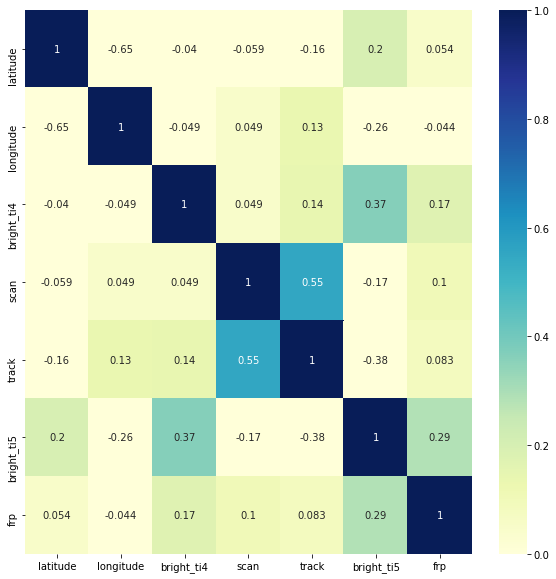

In [ ]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(raw_data.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax)
plt.show()

#### Animate the hotspots detected over time using plotly

*NOTE: The following animation cells do not work on Github or Google Colab (INTERACTIVE VISUALS) <br>
Tested working in Jupyter and VSCode <br>
Github renders images statically and does not support interactive visuals*

Source:
- [Working with Jupyter Notebook Files on Github](https://docs.github.com/en/github/managing-files-in-a-repository/working-with-jupyter-notebook-files-on-github)

In [ ]:
# Write animation to file
fig2 = px.scatter_geo(raw_data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=raw_data['period'].astype(str)) 
fig2.write_html('content/animation.html')

# Display animation
IFrame(src='content/animation.html', width=1080, height=720)

In [ ]:
## Opacity as frp, and the animation combines all the dots in one day

# Write animation to file
fig3 = px.scatter_geo(raw_data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=raw_data['acq_date'].astype(str),
                    opacity = (np.log(raw_data['frp']+1)/np.log(2)*0.01)) 
fig3.write_html('content/animation2.html')

# Display animation
IFrame(src='content/animation2.html', width=1080, height=720)

In [ ]:
## Opacity as frp, and the animation combines all the dots in one day
# same as prev, just the colour is frp.

# Write animation to file
fig4 = px.scatter_geo(raw_data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    animation_frame=raw_data['acq_date'].astype(str),
                    opacity = (np.log(raw_data['frp']+1)/np.log(2)*0.01))

fig4.write_html('content/animation3.html') 

# Display animation
IFrame(src='content/animation3.html', width=1080, height=720)


#### Plot scatterplot of FRP against time using Seaborn

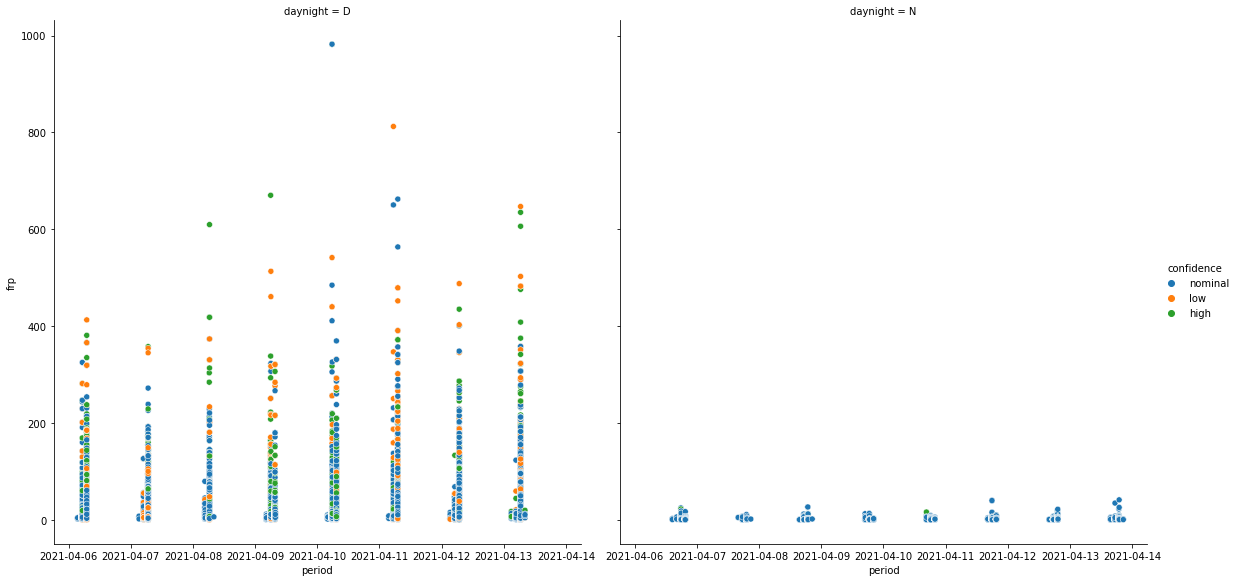

In [ ]:
# FRP/confidence against time
sns_plot = sns.relplot(x="period", y="frp", hue="confidence", col="daynight", data=raw_data, height=8)

We note that there seems to be some data where the gaps between data is small. Hence, this necessitates the merging of time data into hourly frames to better analyze patterns. 

In [ ]:
# Processing data further to clean visualization

# Generate new DFs with times rounded down to the nearest hour
date_sorted = raw_data
date_sorted['period'] = date_sorted['period'].dt.floor('H')
date_sorted_gb = date_sorted.groupby('acq_date') # returns a groupby object which can be called with below code

# [date_sorted.get_group(x) for x in date_sorted_gb.groups] # this displays all the dataframes

date_sorted.head(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,03:30:00,nominal,283.7,4.5,D,2021-04-06 03:00:00
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,03:30:00,nominal,293.1,2.1,D,2021-04-06 03:00:00
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,03:30:00,nominal,289.9,3.5,D,2021-04-06 03:00:00
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,03:30:00,nominal,287.4,4.6,D,2021-04-06 03:00:00
206,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,05:12:00,nominal,298.4,10.4,D,2021-04-06 05:00:00
205,7.75147,122.44508,336.0,0.41,0.37,2021-04-06,05:12:00,nominal,298.0,10.4,D,2021-04-06 05:00:00
204,7.81045,122.85081,333.7,0.42,0.38,2021-04-06,05:12:00,nominal,293.3,2.6,D,2021-04-06 05:00:00
203,7.66033,122.30355,332.7,0.40,0.37,2021-04-06,05:12:00,nominal,298.2,2.2,D,2021-04-06 05:00:00
202,8.09629,125.35864,343.8,0.56,0.43,2021-04-06,05:12:00,nominal,300.7,19.9,D,2021-04-06 05:00:00
201,8.09232,125.35901,336.8,0.56,0.43,2021-04-06,05:12:00,nominal,298.6,5.5,D,2021-04-06 05:00:00


In [ ]:
# Plot individual plots for every date
pd.options.mode.chained_assignment = None  # ignore warnings
# list_date = date_sorted['acq_date'].unique()
%matplotlib inline

for x in date_sorted_gb.groups:
    # Formatting of plot
    fig5,ax5 = plt.subplots(figsize=(12,8))
    ax5.set_title(str(x.date()))
    ax5.set_xlabel('Time of Day (24H Format)')
    ax5.set_ylabel('FRP')
    ax5.set_xlim(0,2400)
    ax5.set_ylim(0,1000)
    ax5.set_xticks(np.linspace(0,2300,num=24))
    plt.setp(ax5.get_xticklabels(), rotation=45)

    # Data of plot
    current = date_sorted_gb.get_group(x) # iterate through groups
    current['acq_time'] = current['period'].dt.time # extract time
    current['acq_time'] = current['acq_time'].apply(str) # convert to type string
    current['acq_time'] = current['acq_time'].str.replace(':','').astype(int)/100 # convert to 24h format
    ax5.scatter(current['acq_time'],current['frp'])
    fig5.savefig('content/'+str(x.date())+'.png')
    plt.close(fig5)

print("Successfully plotted.")

Successfully plotted.


In [ ]:
filenames = date_sorted['acq_date'].dt.date.unique().astype(str)
filenames = [(value+'.png') for value in filenames]

images = []
for filename in filenames:
    images.append(imageio.imread('content/'+filename))
imageio.mimwrite('content/dailyfrp.gif', images, format='gif', duration=1)

Image(url='content/dailyfrp.gif') 

Looking at the above visualizations, we can observe varying trends, such as:
- concentration of fire data within the same region,
- highest number of fires detected in the day,
- patterns in when the fires are detected within the same 7 day period.


Additionally, we also notice the presence of points where the data is seemingly in the middle of the ocean.
Therefore, there is a need to filter the features of the data set to ensure the relevancy of the data in the following sections and models.

# 4 | Data Pre-Processing

### 4.1 | Reformatting Features
Certain columns need to be reformatted into their appropriate data type for analysis. 

In particular, we will be converting categorical data with multiple classfications into dummy variables where each category is a binary variable. To do so, we shall be using a tool known as OneHotEncoding (OHE).

Sources:
- [Coding Systems for Categorical Variables in Regression Analysis](https://stats.idre.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis-2/)

In [ ]:
# Convert 'object' columns into appropriate dtype
raw_data['confidence'].astype('category')
raw_data['daynight'].astype('category') 

0        D
1        D
2        D
3        D
206      D
        ..
45717    N
45709    N
45829    N
46466    N
46467    N
Name: daynight, Length: 46468, dtype: category
Categories (2, object): ['D', 'N']

In [ ]:
# Convert time into integers
raw_data['acq_time'] = raw_data['acq_time'].apply(str) # convert to type string
raw_data['acq_time'] = raw_data['acq_time'].str.replace(':','').astype(int)
raw_data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D,2021-04-06 03:00:00
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,2021-04-06 03:00:00
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,2021-04-06 03:00:00
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,2021-04-06 03:00:00
206,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,2021-04-06 05:00:00


In [ ]:
# Resetting index for OHE preparation
raw_data.set_index('period', inplace=True)
raw_data.reset_index(inplace=True)
raw_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight
0,2021-04-06 03:00:00,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D


## 4.2 | Processing the dataset 
For better analysis, we wanted to process and convert elements of the dataset such that we had more uniform types of features. We ended up with two different datasets to use in our model.




### 4.2.1 | Adding location information
As our dataset was limited in useful features, we wanted to add supplementary information. Using a geopandas package, we were able to get more information about the location of the fire using latitude and longitude. We were able to add information like the country, continent and estimated population of in the area, which could be useful features to determine the intensity of the fire.

In [ ]:
# Converting latitude and longitude values to location values

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#gdf = gpd.GeoDataFrame(raw_data, geometry=gpd.points_from_xy(raw_data['longitude'], raw_data['latitude']), crs={'init': 'epsg:4326'})
gdf = gpd.GeoDataFrame(raw_data, geometry=gpd.points_from_xy(raw_data['longitude'], raw_data['latitude']), crs='epsg:4326')
location_data = gpd.sjoin(gdf, world, how='left')
location_data.head()  

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,2021-04-06 03:00:00,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D,POINT (150.19067 -9.42393),NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,POINT (146.84656 -6.58918),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,POINT (142.35457 -6.35933),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,POINT (142.20834 -5.31813),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,POINT (122.44472 7.75488),147.0,104256076.0,Asia,Philippines,PHL,801900.0


In [ ]:
# Remove irrelevant geometric information and NaN values
location_data.drop(['geometry','index_right','pop_est','iso_a3','gdp_md_est'],axis=1,inplace=True)
location_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,continent,name
0,2021-04-06 03:00:00,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D,NaN,NaN
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,Oceania,Papua New Guinea
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,Oceania,Papua New Guinea
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,Oceania,Papua New Guinea
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,Asia,Philippines


In [ ]:
# Check for null values
location_data.isnull().sum()

period          0
latitude        0
longitude       0
bright_ti4      0
scan            0
track           0
acq_date        0
acq_time        0
confidence      0
bright_ti5      0
frp             0
daynight        0
continent     913
name          913
dtype: int64

In [ ]:
# Above means there are null values present. 
# Solution: remove rows
location_data.dropna(inplace=True)
location_data.reset_index(drop=True) # reset index of dataframe to account for missing values
location_data.isnull().sum()

period        0
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
confidence    0
bright_ti5    0
frp           0
daynight      0
continent     0
name          0
dtype: int64

In [ ]:
# Visualize clean dataset
location_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,continent,name
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,Oceania,Papua New Guinea
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,Oceania,Papua New Guinea
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,Oceania,Papua New Guinea
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,Asia,Philippines
5,2021-04-06 05:00:00,7.75147,122.44508,336.0,0.41,0.37,2021-04-06,51200,nominal,298.0,10.4,D,Asia,Philippines


In [ ]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

ohe_confidence = pd.DataFrame(enc.fit_transform(location_data[['confidence']]).toarray())
ohe_confidence.columns = enc.get_feature_names(['confidence'])
#ohe_confidence.head()

ohe_daynight = pd.DataFrame(enc.fit_transform(location_data[['daynight']]).toarray())
ohe_daynight.columns = enc.get_feature_names(['daynight'])
# ohe_daynight.head()

ohe_continent = pd.DataFrame(enc.fit_transform(location_data[['continent']]).toarray())
ohe_continent.columns = enc.get_feature_names(['continent'])
# ohe_continent.head()

ohe_name = pd.DataFrame(enc.fit_transform(location_data[['name']]).toarray())
ohe_name.columns = enc.get_feature_names(['name'])
# ohe_name.head()

print ("One Hot Encoding for categorical variables complete.")

One Hot Encoding for categorical variables complete.


In [ ]:
# Concatenate OHE variables with dataframe
main_data = pd.concat([location_data,ohe_confidence,ohe_daynight,ohe_continent,ohe_name], axis=1)
main_data.drop(['confidence', 'daynight','continent','name'], axis=1, inplace=True)
main_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,bright_ti5,frp,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000.0,293.1,2.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000.0,289.9,3.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000.0,287.4,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200.0,298.4,10.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Check datatypes of new dataframe
main_data.dtypes

period                   datetime64[ns]
latitude                        float64
longitude                       float64
bright_ti4                      float64
scan                            float64
track                           float64
acq_date                 datetime64[ns]
acq_time                        float64
bright_ti5                      float64
frp                             float64
confidence_high                 float64
confidence_low                  float64
confidence_nominal              float64
daynight_D                      float64
daynight_N                      float64
continent_Asia                  float64
continent_Oceania               float64
name_Bangladesh                 float64
name_Bhutan                     float64
name_Brunei                     float64
name_Cambodia                   float64
name_China                      float64
name_India                      float64
name_Indonesia                  float64
name_Laos                       float64


In [ ]:
# Standardization can only be done on numeric data - hence, columns not of int or float type should be removed.
main_data.drop(['period','acq_date','latitude','longitude'],axis=1,inplace=True)
main_data.dtypes

bright_ti4               float64
scan                     float64
track                    float64
acq_time                 float64
bright_ti5               float64
frp                      float64
confidence_high          float64
confidence_low           float64
confidence_nominal       float64
daynight_D               float64
daynight_N               float64
continent_Asia           float64
continent_Oceania        float64
name_Bangladesh          float64
name_Bhutan              float64
name_Brunei              float64
name_Cambodia            float64
name_China               float64
name_India               float64
name_Indonesia           float64
name_Laos                float64
name_Malaysia            float64
name_Myanmar             float64
name_Nepal               float64
name_Papua New Guinea    float64
name_Philippines         float64
name_Taiwan              float64
name_Thailand            float64
name_Vietnam             float64
dtype: object

In [ ]:
# Check for null values
main_data.isnull().sum()

bright_ti4               895
scan                     895
track                    895
acq_time                 895
bright_ti5               895
frp                      895
confidence_high          895
confidence_low           895
confidence_nominal       895
daynight_D               895
daynight_N               895
continent_Asia           895
continent_Oceania        895
name_Bangladesh          895
name_Bhutan              895
name_Brunei              895
name_Cambodia            895
name_China               895
name_India               895
name_Indonesia           895
name_Laos                895
name_Malaysia            895
name_Myanmar             895
name_Nepal               895
name_Papua New Guinea    895
name_Philippines         895
name_Taiwan              895
name_Thailand            895
name_Vietnam             895
dtype: int64

In [ ]:
# Remove rows containing null values
main_data.dropna(inplace=True)

In [ ]:
#create a dataset to reference to
data_mixed = main_data.copy()
data_mixed.to_csv('./cleaned_datasets/data_mixed.csv',index=False)

In [ ]:
data_mixed.head()

,bright_ti4,scan,track,acq_time,bright_ti5,frp,confidence_high,confidence_low,confidence_nominal,daynight_D,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
1,330.7,0.43,0.38,33000.0,293.1,2.1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,328.9,0.53,0.50,33000.0,289.9,3.5,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,326.2,0.52,0.50,33000.0,287.4,4.6,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,335.1,0.41,0.37,51200.0,298.4,10.4,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,336.0,0.41,0.37,51200.0,298.0,10.4,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.2.2 | Converting continuous features into categorical features
To make the model more accurate, we attempted to convert continuous features into categorical features by splitting the datapoints into 5 bins of equally spaced out ranges of continuous data. We will then use OHE to convert these bins into dummy variables. This is so that we can simplify and standardize the type of features which is fed to the models by converting all the features (X) to binary variables. We will be training our models using this preprocessed fully categorical dataset, as well as the mixed continous-categorical dataset.

In [ ]:
# Generate labels for modified dataset
mod_var = [[],[],[],[],[]]
var = ['bright_ti4','scan','track','bright_ti5']
quantile = ['_20p','_40p','_60p','_80p','_100p']
quartile = ['_25p','_50p','_75p','_100p']

for x in range(len(var)):
    mod_var[x] = [var[x] + value for value in quantile]
    print (mod_var[x])
    
# this is only for time, which can be broadly split into 4 quarters
mod_var[-1]=['acq_time'+value for value in quartile] 
print (mod_var[-1])

['bright_ti4_20p', 'bright_ti4_40p', 'bright_ti4_60p', 'bright_ti4_80p', 'bright_ti4_100p']
['scan_20p', 'scan_40p', 'scan_60p', 'scan_80p', 'scan_100p']
['track_20p', 'track_40p', 'track_60p', 'track_80p', 'track_100p']
['bright_ti5_20p', 'bright_ti5_40p', 'bright_ti5_60p', 'bright_ti5_80p', 'bright_ti5_100p']
['acq_time_25p', 'acq_time_50p', 'acq_time_75p', 'acq_time_100p']


In [ ]:
# Convert input to categorical input

data_bright_ti4,data_bright_ti4_intervals=pd.qcut(main_data['bright_ti4'], 5, retbins=True,
                        labels=mod_var[0])
data_scan,data_scan_intervals=pd.qcut(main_data['scan'], 5, retbins=True,
                        labels=mod_var[1])
data_track,data_track_intervals=pd.qcut(main_data['track'], 5, retbins=True,
                        labels=mod_var[2])
data_bright_ti5,data_bright_ti5_intervals=pd.qcut(main_data['bright_ti5'], 5, retbins=True,
                        labels=mod_var[3])
data_acq_time,data_acq_time_intervals=pd.qcut(main_data['acq_time'], 4, retbins=True,
                        labels=mod_var[4])

In [ ]:
#Concatenate all to a single DF
cont_var = pd.concat([data_bright_ti4,data_scan,data_track,data_bright_ti5,data_acq_time], axis=1)

In [ ]:
# Drop any null variables
cont_var.dropna(inplace= True)

In [ ]:
# One-Hot Encoding
ohe_bright_ti4 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti4']]).toarray())
ohe_bright_ti4.columns = enc.get_feature_names(['bright_ti4'])

ohe_scan = pd.DataFrame(enc.fit_transform(cont_var[['scan']]).toarray())
ohe_scan.columns = enc.get_feature_names(['scan'])

ohe_track = pd.DataFrame(enc.fit_transform(cont_var[['track']]).toarray())
ohe_track.columns = enc.get_feature_names(['track'])

ohe_bright_ti5 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti5']]).toarray())
ohe_bright_ti5.columns = enc.get_feature_names(['bright_ti5'])

ohe_acq_time = pd.DataFrame(enc.fit_transform(cont_var[['acq_time']]).toarray())
ohe_acq_time.columns = enc.get_feature_names(['acq_time'])

print ("One Hot Encoding for binned continuous variables complete.")

One Hot Encoding for binned continuous variables complete.


In [ ]:
main_data.drop(['bright_ti4','scan','track','acq_time','bright_ti5'],axis=1,inplace=True)
main_data = pd.concat([ohe_bright_ti4,ohe_scan,ohe_track,ohe_bright_ti5,ohe_acq_time,main_data],axis=1)

In [ ]:
main_data.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Check for null data
main_data.isnull().sum()

bright_ti4_bright_ti4_100p    865
bright_ti4_bright_ti4_20p     865
bright_ti4_bright_ti4_40p     865
bright_ti4_bright_ti4_60p     865
bright_ti4_bright_ti4_80p     865
scan_scan_100p                865
scan_scan_20p                 865
scan_scan_40p                 865
scan_scan_60p                 865
scan_scan_80p                 865
track_track_100p              865
track_track_20p               865
track_track_40p               865
track_track_60p               865
track_track_80p               865
bright_ti5_bright_ti5_100p    865
bright_ti5_bright_ti5_20p     865
bright_ti5_bright_ti5_40p     865
bright_ti5_bright_ti5_60p     865
bright_ti5_bright_ti5_80p     865
acq_time_acq_time_100p        865
acq_time_acq_time_25p         865
acq_time_acq_time_50p         865
acq_time_acq_time_75p         865
frp                           865
confidence_high               865
confidence_low                865
confidence_nominal            865
daynight_D                    865
daynight_N    

In [ ]:
# Drop null data
main_data.dropna(inplace=True)

In [ ]:
#create a dataset to reference to
data_binned = main_data.copy()
data_binned.to_csv('./cleaned_datasets/data_binned.csv',index=False) 

In [ ]:
data_binned.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.2.3 | Dataset Summary
With that, we have 2 preprocessed datasets that we can use to train our models:


1.   Mixed Dataset - Binary Features + Continuous Features Mix
2.   Binned Dataset - All Binary Features



## 4.3 | Feature Selection

With our two pre-processed datasets, we shall do some feature selection to make our models run faster and smoother. 

In [ ]:
# Mixed Dataset
Xmix = data_mixed.drop(['frp'], axis=1)
ymix = pd.DataFrame(data_mixed['frp'])

# Binned Dataset
Xbin = data_binned.drop(['frp'], axis=1)
ybin = pd.DataFrame(data_binned['frp'])

### 4.3.1 | Correlation Matrix + Heatmap

#### Correlation Matrix for Mixed Dataset

To generate the correlation matrix for the mixed dataset, we first standardize the variables with z-scoring such that the spread of each variable is comparable to each other.

In [ ]:
##z-scoring standardization

from sklearn.preprocessing import StandardScaler
def standardize(df):
  # create a scaler object
  std_scaler = StandardScaler()
  # fit and transform the data
  return pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)


X_cleaned  = standardize(data_mixed)
X_cleaned.head()

,bright_ti4,scan,track,acq_time,bright_ti5,frp,confidence_high,confidence_low,confidence_nominal,daynight_D,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,-0.371369,-0.343223,-0.755398,-1.151754,-0.691093,-0.390304,-0.211257,-0.358256,0.430692,0.397057,...,-0.109799,-0.442615,-0.048776,-0.889171,-0.009464,36.774085,-0.196665,-0.024595,-0.17963,-0.272166
1,-0.488961,0.908621,0.322153,-1.151754,-1.091125,-0.348594,-0.211257,-0.358256,0.430692,0.397057,...,-0.109799,-0.442615,-0.048776,-0.889171,-0.009464,36.774085,-0.196665,-0.024595,-0.17963,-0.272166
2,-0.665351,0.783437,0.322153,-1.151754,-1.403650,-0.315821,-0.211257,-0.358256,0.430692,0.397057,...,-0.109799,-0.442615,-0.048776,-0.889171,-0.009464,-0.027193,5.084789,-0.024595,-0.17963,-0.272166
3,-0.083920,-0.593592,-0.845194,-0.697508,-0.028540,-0.143019,-0.211257,-0.358256,0.430692,0.397057,...,-0.109799,-0.442615,-0.048776,-0.889171,-0.009464,-0.027193,5.084789,-0.024595,-0.17963,-0.272166
4,-0.025123,-0.593592,-0.845194,-0.697508,-0.078544,-0.143019,-0.211257,-0.358256,0.430692,0.397057,...,-0.109799,-0.442615,-0.048776,-0.889171,-0.009464,-0.027193,5.084789,-0.024595,-0.17963,-0.272166


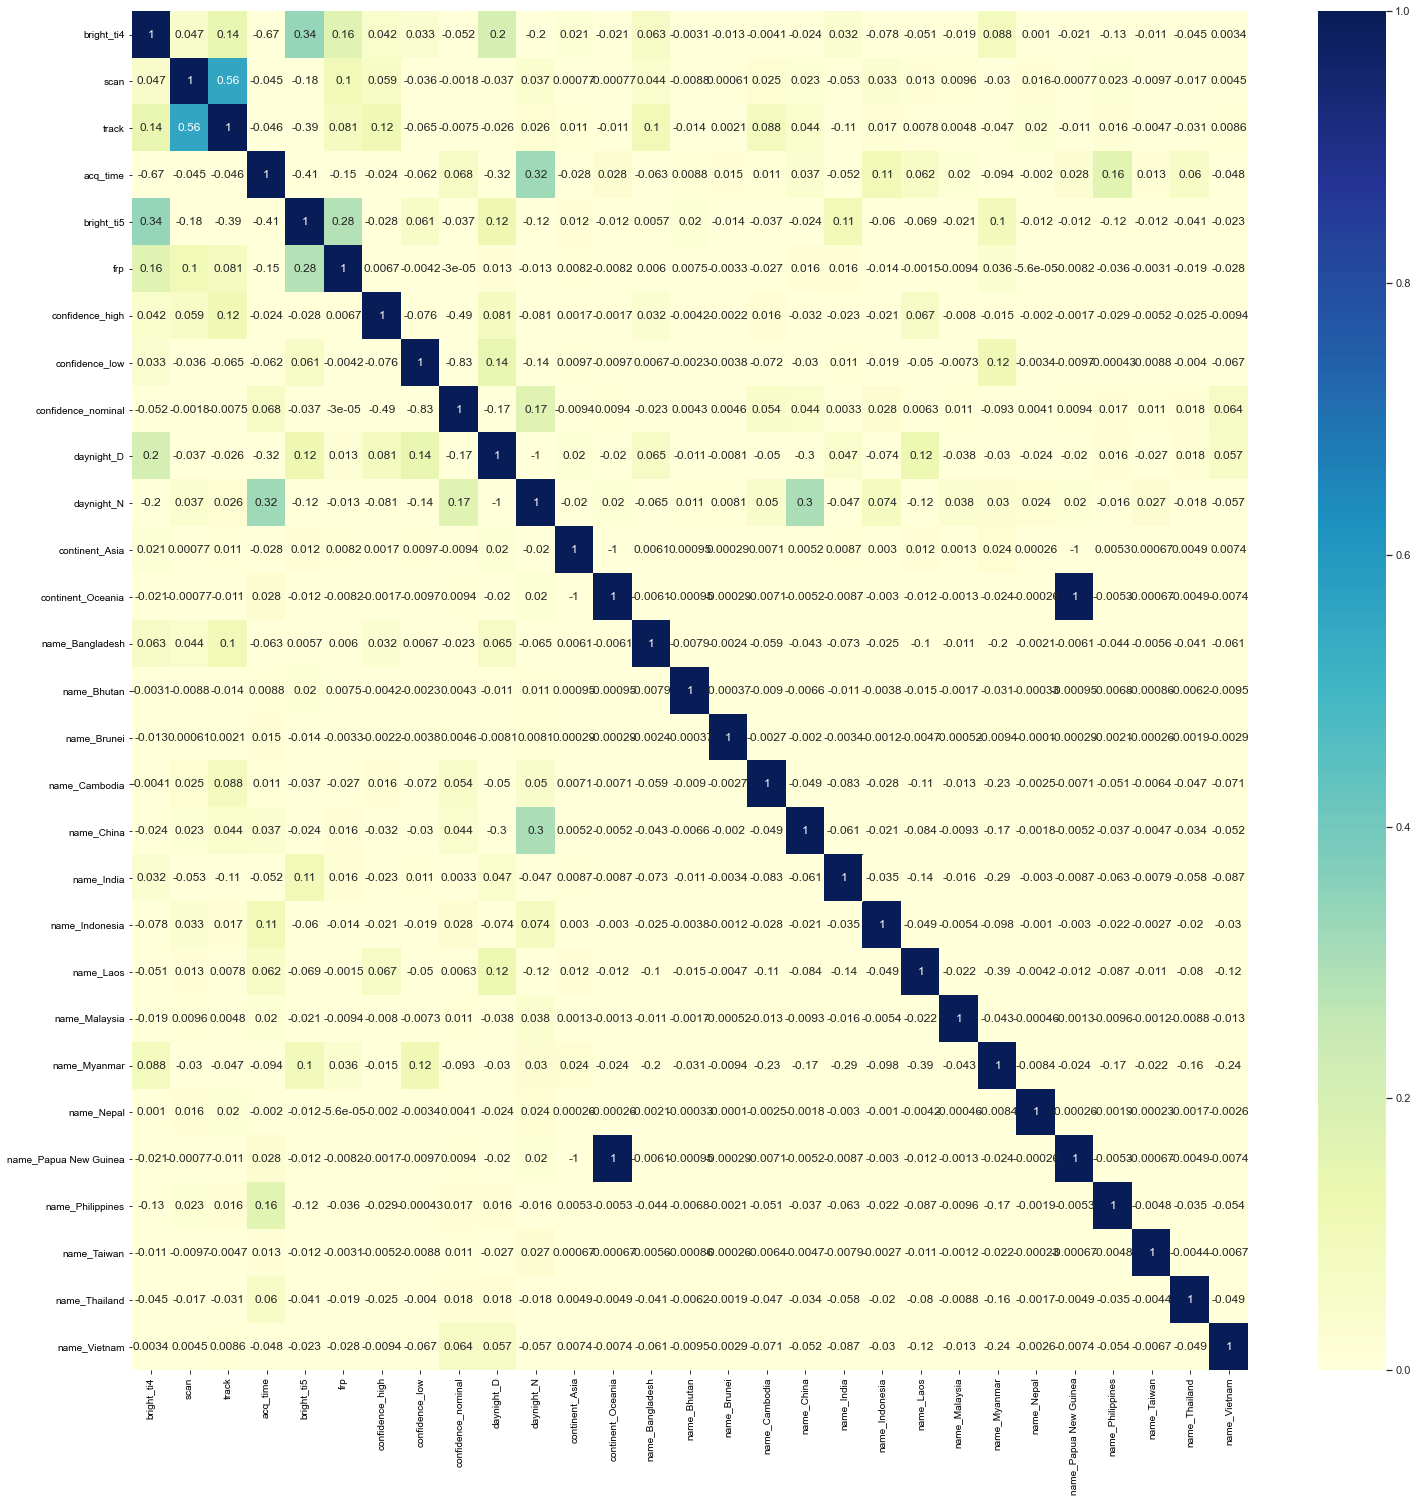

In [ ]:
Xdata = X_cleaned.copy()
fig6, ax6 = plt.subplots(figsize=(25,25)) 
sns.set()
ax6 = sns.heatmap(Xdata.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax6)

From the heatmap, we can see three strong co-relations which we can investigate:


1.   Strong corelation between scan and track of 0.53*. This is expected as scan and track are factors which indicate the angle and position which the satelite was at in relation to the ground position when taking the reading.
2.  Corelation between bright_ti4, bright_ti5 and frp values of around 0.2*. This makes sense as fires give off light in addition to heat. A more intense fire with a higher frp value is expected to give off more light and affect the bright_ti4 and bright_ti5 values. Bright_ti4 and Bright_ti5 represent different channels of light detection in this case.
3. Acq_time and Day_night of 0.32*. There is obvious relation there as the Acq_time (which is in UTC+0) is the sole factor in indicating whether the reading was taken at night or in the day. 

Out of all these relations, we would like to explore the relationship between brightness values and frp values for our project.

We also note that most of the variables are independent of each other, which is ideal for choosing dimensions which do not overlap for our function.


**values might be subject to change due to the dynamic updating of our dataset*


#### Correlation Matrix for Binned Dataset

To generate the correlation matrix for the binned dataset, the binary variables are compared to each other. 

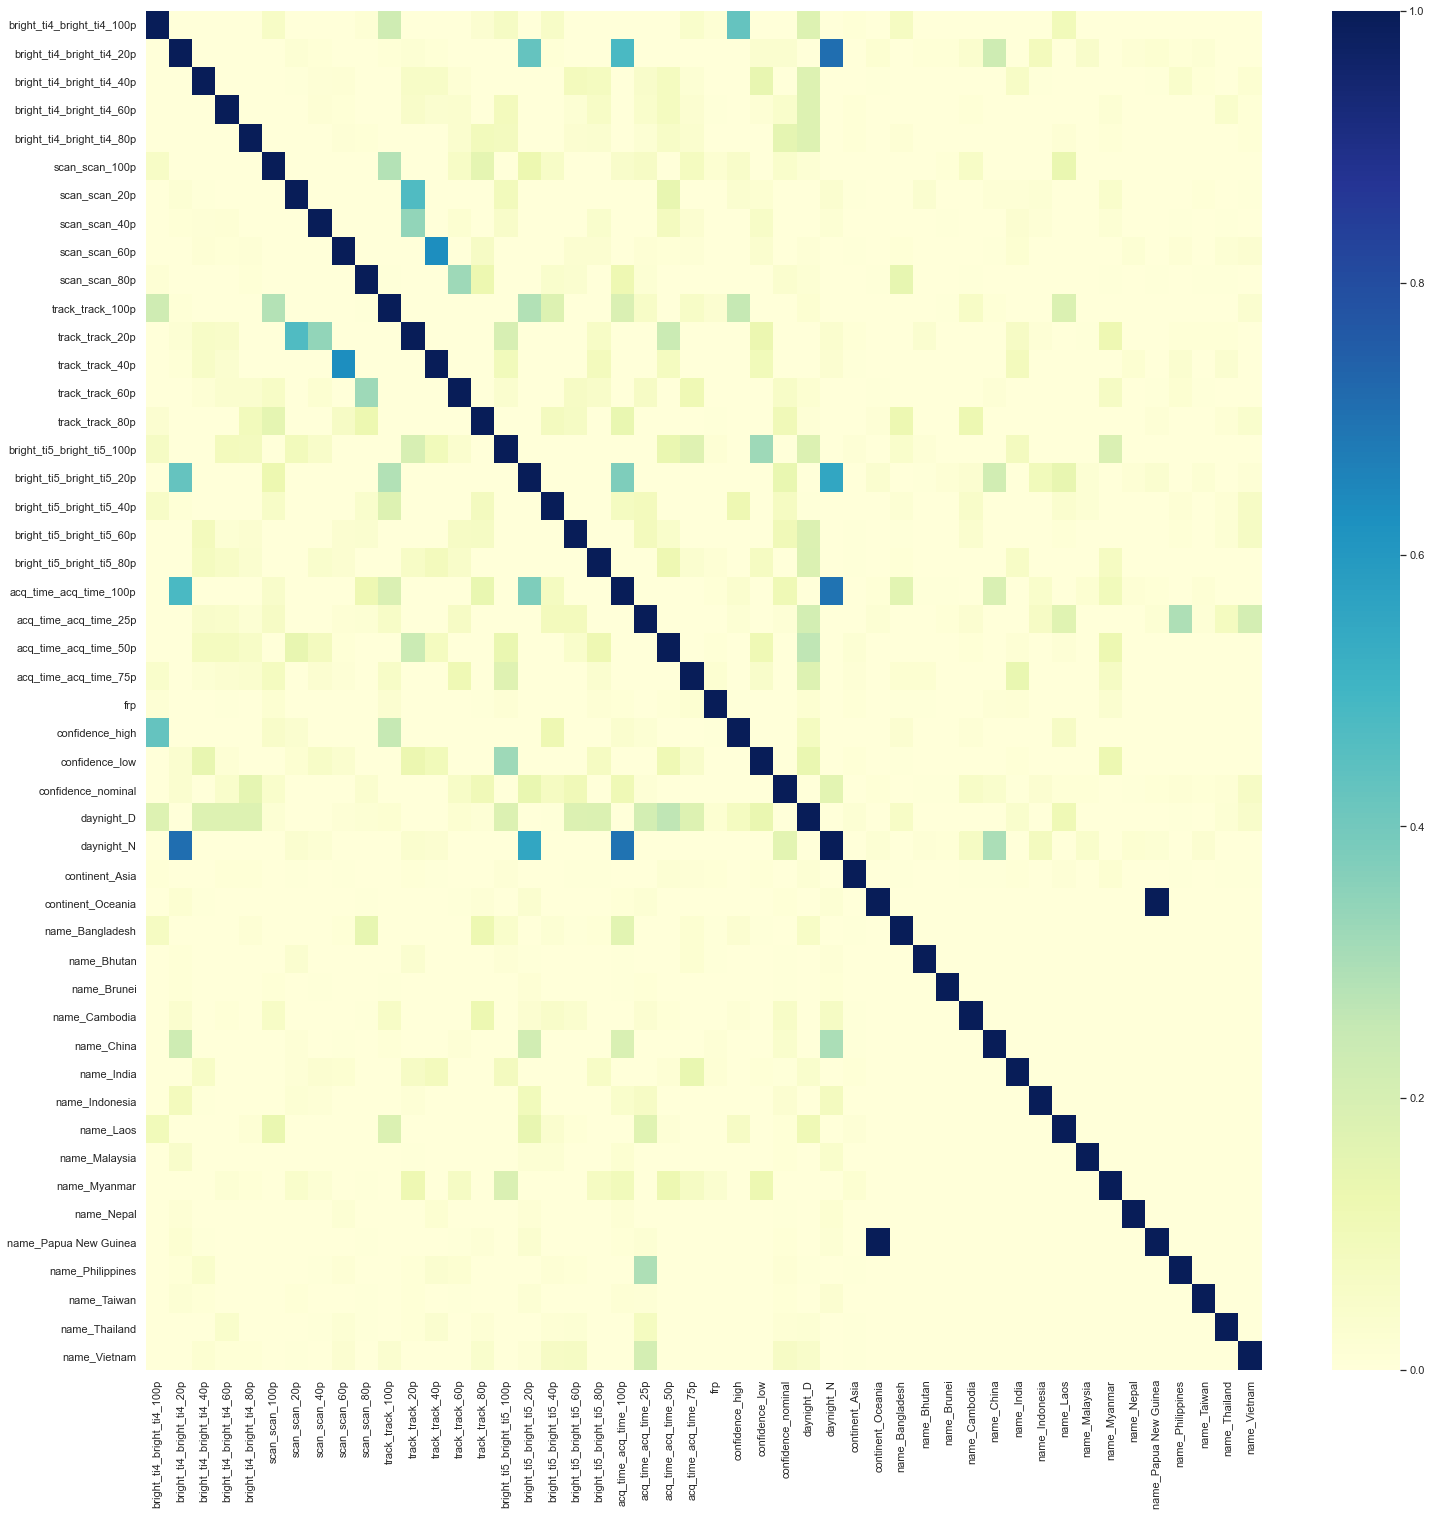

In [ ]:
Xdata = data_binned
fig7, ax7 = plt.subplots(figsize=(25,25)) 
sns.set()
ax7 = sns.heatmap(Xdata.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=False,ax=ax7)

### 4.3.2 | Random Forest Model

Random Forest Model is a model which we are going to utilize later in Section 5.4. It uses decision trees to categorize and predict frp values.

Random Forest model comprises of a user-determined number of decision trees. 

It works through the following steps:
1. A random sample is selected from the given dataset.
2. From this random sample, a decision tree is crafted. Assuming there are n random samples selected, there will be n decision trees. (The argument n_estimators allows the user to choose the value of n.)
3. When the Random Forest model makes a prediction, each decision tree will then produce a predicted result. Voting will commence for all n decision trees.
4. Once all n predicted results have been voted upon, the highest voted result is the final prediction.

The model has proven to be both accurate and robust due to the number of decision trees involved; additionally, due to it taking the average of all predictions by the decision trees, it is not affected by overfitting.


#### Decision tree and feature importance

1. Decision trees generate rules that filter the dataset based on feature values to reach the lowest variability in each leaf node (leaf node is the node at the end of the decision tree which determines the predicted results of the model)

2. As the decision tree compares the how the variability of FRP changes when a rule filtering by a certain feature x is concerned, a decision tree model is able to calculate the amount of variance that gets reduced per feature of the decision tree.

3. This variance is recorded under feature_importances_ under sci kit learn's random tree model when it is training and this is what we will be using for our feature selection.


Sources: 
- [Random Forest in Python](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
- [Understanding Random Forests Classifiers in Python](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

#### Random Forest on Mixed Dataset

In [ ]:
##convert to numpy to use with randomforest
X = Xmix
y = ymix

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(X.values, y.values.ravel());

# get importance
importance = rf.feature_importances_
# print(importance)
# summarize feature importance
important_features_dict = {}
for i,v in enumerate(importance):
    important_features_dict[X.columns[i]] = v

sorted_values = sorted(important_features_dict.values(),reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in important_features_dict.keys():
        if important_features_dict[k] == i:
            sorted_dict[k] = important_features_dict[k]
            break

toplist = []
for i in sorted_dict:
    #print(i,sorted_dict[i])
    toplist.append(i)

first3vals_mixed = toplist[:3]
print("The top 3 factors correlating to the Fire Radiative Power are %s, %s, %s" % ( first3vals_mixed[0], first3vals_mixed[1] , first3vals_mixed[2] ))

The top 3 factors correlating to the Fire Radiative Power are bright_ti5, bright_ti4, scan


#### Random Forest on Binned Dataset

In [ ]:
##convert to numpy to use with randomforest
X = Xbin
y = ybin

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(X.values, y.values.ravel());

# get importance
importance = rf.feature_importances_
# print(importance)
# summarize feature importance
important_features_dict = {}
for i,v in enumerate(importance):
    important_features_dict[X.columns[i]] = v

sorted_values = sorted(important_features_dict.values(),reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in important_features_dict.keys():
        if important_features_dict[k] == i:
            sorted_dict[k] = important_features_dict[k]
            break

toplist = []
for i in sorted_dict:
    #print(i,sorted_dict[i])
    toplist.append(i)

first3vals_binned = toplist[:3]
print("The top 3 factors correlating to the Fire Radiative Power are %s, %s, %s" % ( first3vals_binned[0], first3vals_binned[1] , first3vals_binned[2] ))

The top 3 factors correlating to the Fire Radiative Power are bright_ti4_bright_ti4_60p, scan_scan_80p, bright_ti5_bright_ti5_60p


# 5 | Data Analysis - Supervised Learning Models
In this section, we shall be using our datasets to train three different models to attempt to predict a value of FRP (Fire Radiative Power). Fire Radiative Power is the detected thermal energy of the fire, which is indicative of the size and intensity of the wildfire.

<p> From the feature selection, we shall be using the top 3 features selected by the random forest importance ranking for the mixed dataset. These features are usualy bright_ti5, bright_ti4 and scan.*</p>

<p> On the other hand, feature selecting the top importance features for the binned dataset caused dummy variables from the same set of continuous data to take up the top spots. As the binned dataset is made up of fully binary variables, which is simpler to handle, we will run and train the model using the full set of features in the binned dataset.</p>

**values might be subject to change due to the dynamic updating of our dataset*


In [ ]:
#datasets after feature selection

data_xs_mixed = data_mixed[[first3vals_mixed[0], first3vals_mixed[1] , first3vals_mixed[2] ]]
data_y_mixed = data_mixed[['frp']]

data_xs_binned = data_binned.drop(['frp'], axis=1)
data_y_binned = data_binned[['frp']]

In [ ]:
data_xs_mixed.head()

,bright_ti5,bright_ti4,scan
1,293.1,330.7,0.43
2,289.9,328.9,0.53
3,287.4,326.2,0.52
4,298.4,335.1,0.41
5,298.0,336.0,0.41


In [ ]:
data_xs_mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44660 entries, 1 to 45554
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bright_ti5  44660 non-null  float64
 1   bright_ti4  44660 non-null  float64
 2   scan        44660 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


In [ ]:
data_y_mixed.head()

,frp
1,2.1
2,3.5
3,4.6
4,10.4
5,10.4


In [ ]:
data_y_mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44660 entries, 1 to 45554
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frp     44660 non-null  float64
dtypes: float64(1)
memory usage: 697.8 KB


In [ ]:
data_xs_binned.head(5)

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_xs_binned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43795 entries, 1 to 44659
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bright_ti4_bright_ti4_100p  43795 non-null  float64
 1   bright_ti4_bright_ti4_20p   43795 non-null  float64
 2   bright_ti4_bright_ti4_40p   43795 non-null  float64
 3   bright_ti4_bright_ti4_60p   43795 non-null  float64
 4   bright_ti4_bright_ti4_80p   43795 non-null  float64
 5   scan_scan_100p              43795 non-null  float64
 6   scan_scan_20p               43795 non-null  float64
 7   scan_scan_40p               43795 non-null  float64
 8   scan_scan_60p               43795 non-null  float64
 9   scan_scan_80p               43795 non-null  float64
 10  track_track_100p            43795 non-null  float64
 11  track_track_20p             43795 non-null  float64
 12  track_track_40p             43795 non-null  float64
 13  track_track_60p             437

In [ ]:
data_y_binned.head(5)

,frp
1,2.1
2,3.5
3,4.6
4,10.4
5,10.4


In [ ]:
data_y_binned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43795 entries, 1 to 44659
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frp     43795 non-null  float64
dtypes: float64(1)
memory usage: 684.3 KB


Dataset: Mixed


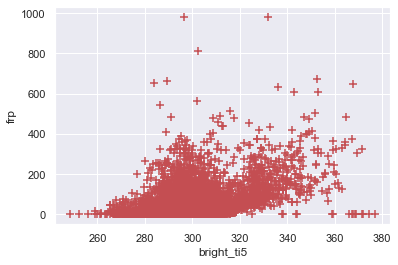

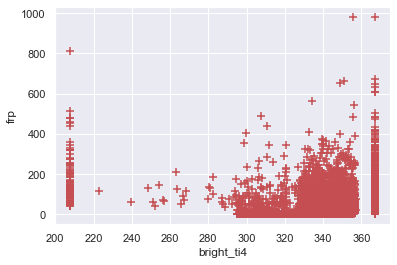

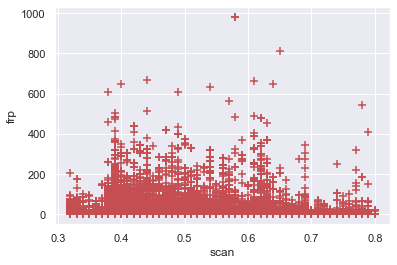

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualization of our cleaned dataset, for continous variables
def scatterplot_XY(x, y, x_label):
    plt.scatter(x, y, s=60, c='r', marker='+')
    #plt.xlabel(x.keys())
    plt.ylabel('frp') 
    plt.xlabel(x_label)
    plt.show()
    plt.clf()

#plot frp against each xn variable
def viz_data(data_xs, data_y, dataset_name = "Dataset"):
    print("Dataset:", dataset_name)
    for column in data_xs:
        x= data_xs[column]
        y = data_y
        scatterplot_XY(x, y, column)

viz_data(data_xs_mixed, data_y_mixed, "Mixed")
#viz_data(data_xs_binned, data_y_binned, "Binned")

Dataset: Mixed


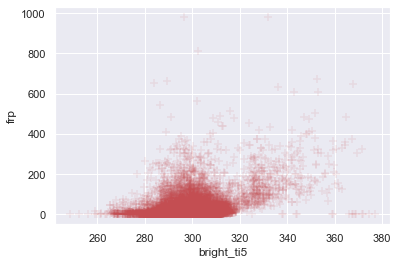

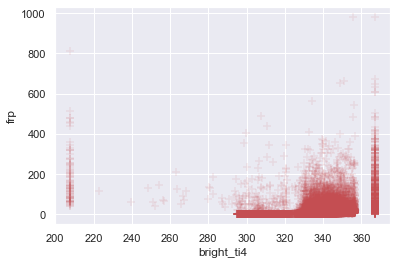

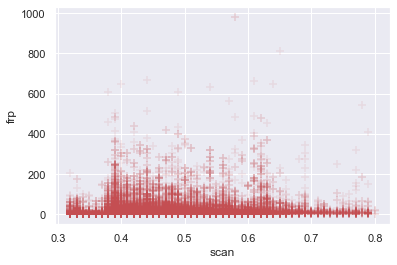

<Figure size 432x288 with 0 Axes>

In [ ]:
# due to the high density of our points, we shall reduce their opacity and visualize them in terms of density
#visualization, but with the opacity of each point at 0.1
def scatterplot_XY(x, y,x_label = "x_variable"):
    plt.scatter(x, y, s=60, c='r', marker='+', alpha = 0.1, label='Class0')
    #plt.xlabel(x.keys())
    plt.ylabel('frp') 
    plt.xlabel(x_label)
    plt.show()
    plt.clf()

#plot frp against each xn variable
viz_data(data_xs_mixed, data_y_mixed, "Mixed")

## 5.1 | Approach
This is a regression problem, where we are attempting to predict a continous variable y = FRP, from 3 different features X = ['bright_ti4', 'bright_ti5', 'confidence_high']

We will be applying 3 different regression models to attempt to quantify a relationship between the X and y variables. The models are: 
1.   Linear Regression
2.   Polynomial Regression
3.   Random Forest




In [ ]:
#create empty dataframe to store the model accuracies
df_accuracy = pd.DataFrame(columns=['Model Name','DataSet','Type of Model','X_features','y_target','Accuracy','Loss', 'Reg/w'])

### 5.1.1 | Train-Validation-Test Split

Before we work on the dataset, we are going to split the dataset into train sets and test sets. The train set will be used for creating and fitting our model parameters, while the test data is used to evaluate the accuracy and effectiveness of our model for predicting FRP values. 

For models that have hyperparameters to be calibrated, we shall also split the train set from above into train-validation sets and conduct cross-fold validation to calibrate the hyperparameters.

In [ ]:
#train-test split, WRAPPER FUNCTION   
from sklearn.model_selection import train_test_split
def train_test_s(data_xs, data_y, dataset_name = "Dataset"):
    print("Dataset:", dataset_name)
    X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.2, random_state=0)
    print("Shape of Train Dataset (X,y):", X_train.shape, y_train.shape)
    print("Shape of Test Dataset (X,y):", X_test.shape, y_test.shape)
    print("")
    return  X_train, X_test, y_train, y_test

X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_s(data_xs_mixed, data_y_mixed, "Mixed")
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_s(data_xs_binned, data_y_binned, "Binned")

Dataset: Mixed
Shape of Train Dataset (X,y): (35728, 3) (35728, 1)
Shape of Test Dataset (X,y): (8932, 3) (8932, 1)

Dataset: Binned
Shape of Train Dataset (X,y): (35036, 47) (35036, 1)
Shape of Test Dataset (X,y): (8759, 47) (8759, 1)



#### 4-Fold Cross Validation Set Split
Cross Validation is the practice of using a separate validation dataset to select for hyperparameters for the model like degree of polynomial model or regularization parameters. 

The Train set is further split into a Train set and a Validation set. The model is trained with different hyperparameters, and each of these models are then evaluated against the validation set. We can find the ideal values for the hyperparameters by finding the model which has the lowest validation loss/highest validation score. Since the test set hasn't been used in this process, the test set then can be used to evaluate the generalization and performance of our model.

In 4-Fold Cross Validation, the train set is split into 4 sections and the model is trained 4 times, each time with a different section taken out as the validation set. The validation score used to find the ideal model is the mean of the 4 trained models and this further helps to reduce overfitting.

This approach will be used to find the hyperparameter degree d of our polynomial model in Section 5.3.

In [ ]:
#train-validation Cross Validation with 4 folds
def crossvald(data_xs, data_y):
    ### n_folds = 4
    #split train set into 4 equally sized sections
    X_b1, X_b2, y_b1, y_b2 = train_test_split(data_xs, data_y, test_size=0.5, random_state=0)
    X_1, X_2, y_1, y_2 = train_test_split(X_b1, y_b1, test_size=0.5, random_state=0)
    X_3, X_4, y_3, y_4 = train_test_split(X_b2, y_b2, test_size=0.5, random_state=0)

    #create a dictionary which assigns which is the train set and which is the validation set
    cross_sets ={1:{'train_X': np.concatenate((X_2,X_3,X_4)),
                  'train_y': np.concatenate((y_2,y_3,y_4)),
                  'val_X': X_1,
                  'val_y': y_1,
                   },
                2:{'train_X': np.concatenate((X_1,X_3,X_4)),
                  'train_y': np.concatenate((y_1,y_3,y_4)),
                  'val_X': X_2,
                  'val_y': y_2,
                   },
                3:{'train_X': np.concatenate((X_2,X_1,X_4)),
                  'train_y': np.concatenate((y_2,y_1,y_4)),
                  'val_X': X_3,
                  'val_y': y_3,
                   },
                4:{'train_X': np.concatenate((X_2,X_3,X_1)),
                  'train_y': np.concatenate((y_2,y_3,y_1)),
                  'val_X': X_4,
                  'val_y': y_4,
                   },
                }
    return cross_sets

#generate train-validation sets for polynomial regression in Section 5.3
CValSets_mixed = crossvald(X_train_mixed, y_train_mixed)

### 5.1.2 | Accuracy Score Formulas

To evaluate the accuracy of the regression model, we shall be using the following accuracy and loss formula across all the models. This formula is modified from the mean absolute percentage error (MAPE) metric, which is a common metric used to compare between different regression models trained on the same data and used in the forecasting statistics.


Absolute Percent Error: 
$$
A.P.E. (y_{pred}, y_{actual}) 
= \frac{error}{actual} 
= \frac{|y_{pred}- y_{actual}| }{ | y_{pred}+y_{actual}|/2} 
$$

While the actual value of  $y_{actual}$ should be $y_{actual}$,  the mean of $y_{pred}$ and $y_{actual}$ is used to prevent division by zero errors. 

\
Accuracy:
<br>
\begin{align}
 Acc. (y_{pred}, y_{actual}) 
& = 1- mean (A.P.E.) \\
& = 1- \frac{1}{n} *  \sum\frac{|y_{pred}- y_{actual}| }{ | y_{pred}+y_{actual}|/2} 
\end{align}

Loss:
$$
L(y_{pred}, y_{actual}) = \frac{1}{n} *  \sum (y_{pred} - y_{actual})^2
$$



We shall be using the sci-kit learn library for implementation of all the models.

</br>
</br>

Sources: 
- [Explanation of MAE and common regression metrics](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)
- [Forecasting and Mean Absolute Percent Error](http://demandplanning.net/MAPE.htm)

In [ ]:
#mean square error as loss
def loss_mse(y_actual, y_pred):
    n = len(y_pred)
    total = (y_pred-y_actual).T.dot(y_pred-y_actual)
    loss = 1/n* total
    if isinstance(loss, pd.DataFrame):
        loss = loss.values[0][0]
    return loss

def mape (y_actual, y_pred):
    # Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
    mape = 100 * (abs(y_pred-y_actual) / ((abs(y_actual+y_pred))/2))
    if isinstance(mape, pd.DataFrame):
        mape = mape.values
    return mape

def accuracy(y_actual, y_pred):
    mape = 100 * (abs(y_pred-y_actual) / ((abs(y_actual+y_pred))/2))
    if isinstance(mape, pd.DataFrame):
        mape = mape.values
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    return accuracy 

## 5.2 | Linear Regression Model
Firstly, we shall be attempting to use a simple linear regression model to predict the continuous FRP values

In [ ]:
typeofmodel = "Linear"

from sklearn.linear_model import LinearRegression 
def linear_reg(X,y):
    reg = LinearRegression().fit(X, y)

    #R^2 value, which is max 1
    print("Model Score (R^2):", reg.score(X, y))
    print("Coeffcients", list(X.columns),": ", reg.coef_)
    print("Intercept:", reg.intercept_)

    return reg

print("Dataset: Mixed")
reg_train_mixed = linear_reg(X_train_mixed, y_train_mixed)

print("")
print("Dataset: Binned")
reg_train_binned = linear_reg(X_train_binned, y_train_binned)

Dataset: Mixed
Model Score (R^2): 0.10349259550408463
Coeffcients ['bright_ti5', 'bright_ti4', 'scan'] :  [[ 1.17616521  0.12648073 63.91383393]]
Intercept: [-407.86270848]

Dataset: Binned
Model Score (R^2): 0.008760713340034254
Coeffcients ['bright_ti4_bright_ti4_100p', 'bright_ti4_bright_ti4_20p', 'bright_ti4_bright_ti4_40p', 'bright_ti4_bright_ti4_60p', 'bright_ti4_bright_ti4_80p', 'scan_scan_100p', 'scan_scan_20p', 'scan_scan_40p', 'scan_scan_60p', 'scan_scan_80p', 'track_track_100p', 'track_track_20p', 'track_track_40p', 'track_track_60p', 'track_track_80p', 'bright_ti5_bright_ti5_100p', 'bright_ti5_bright_ti5_20p', 'bright_ti5_bright_ti5_40p', 'bright_ti5_bright_ti5_60p', 'bright_ti5_bright_ti5_80p', 'acq_time_acq_time_100p', 'acq_time_acq_time_25p', 'acq_time_acq_time_50p', 'acq_time_acq_time_75p', 'confidence_high', 'confidence_low', 'confidence_nominal', 'daynight_D', 'daynight_N', 'continent_Asia', 'continent_Oceania', 'name_Bangladesh', 'name_Bhutan', 'name_Brunei', 'name_C

In [ ]:
##Evaluation of Model Against Test set

def linevaluation(X_train, y_train, X_test, y_test, reg):
  
    #Test Set
    y_pred = reg.predict(X_test)

    #Print Dataframe Actual v.s. Predicted, Test
    #print(y_pred[:5], type(y_pred), y_pred.shape)
    df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])
    print("Test Set - Actual vs Predicted")
    print (df[:5])

    #Calculate Losses 
    #Loss Test Set
    Loss_test = loss_mse(y_test, y_pred)
    print("Loss Test Set", Loss_test)

    #Loss Train Set
    y_pred_train = reg.predict(X_train)
    Loss_train = loss_mse(y_train, y_pred_train)
    print("Loss Train set:", Loss_train)

    #Calculate percent error and accuracy (Test)
    MAPE = mape (y_test, y_pred)
    Accuracy = accuracy(y_test, y_pred)
    print('Accuracy:', round(Accuracy, 2), '%.')

    return Accuracy, MAPE, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, mape_mixed, loss_mixed = linevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed)

print("")
print("Dataset: Binned")
accuracy_binned, mape_binned, loss_binned = linevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned)

Dataset: Mixed
Test Set - Actual vs Predicted
   Actual  Predicted
0    20.5  14.339295
1    29.7  21.400252
2    11.3  17.586289
3     1.8  22.988448
4     9.1  14.094823
Loss Test Set 1072.200188597161
Loss Train set: 988.3689231572396
Accuracy: -63.38 %.

Dataset: Binned
Test Set - Actual vs Predicted
   Actual  Predicted
0     1.2   15.78125
1    19.2   16.18750
2     2.8   12.28125
3     6.0   14.78125
4     9.1   10.90625
Loss Test Set 1189.6503460815304
Loss Train set: 1063.4087587655376
Accuracy: 4.53 %.


In [ ]:
#store the model accuracies
dict2 = {'Model Name' : 'Linear, Mixed', 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_mixed,
         'Loss': loss_mixed,
         'Reg/w': reg_train_mixed }


df_accuracy = df_accuracy.append(dict2, ignore_index = True)

In [ ]:
dict3 = {'Model Name' : 'Linear, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned,
         'Loss': loss_binned,
         'Reg/w': reg_train_binned }


df_accuracy = df_accuracy.append(dict3, ignore_index = True)

In [ ]:
df_accuracy

,Model Name,DataSet,Type of Model,X_features,y_target,Accuracy,Loss,Reg/w
0,"Linear, Mixed",Mixed,Linear,"[bright_ti5, bright_ti4, scan]",[frp],-63.377186,1072.200189,LinearRegression()
1,"Linear, Binned",Binned,Linear,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],4.530438,1189.650346,LinearRegression()


Dataset: Mixed


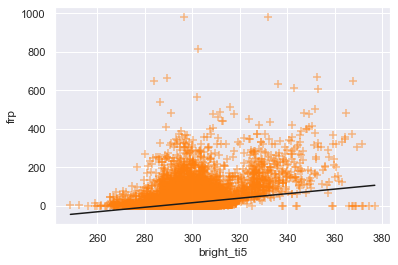

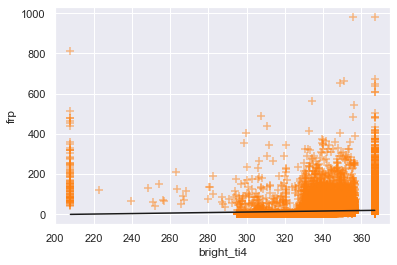

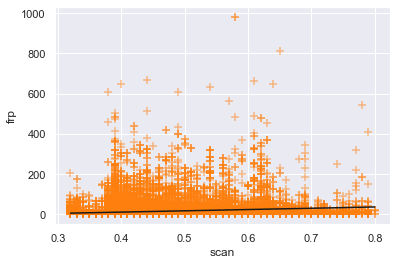

<Figure size 432x288 with 0 Axes>

In [ ]:
#for visualization 
def linearviz_withmodel(data_xs, data_y, reg_train):
    #calculate a mean value for all the testpoints
    meancol = data_xs.mean(axis=0).to_frame().transpose()
    #create a vizualization for each xn feature
    for column in data_xs:
        #for scatter plot
        x= data_xs[column]
        y= data_y  
        
        #for model line
        n_line = 100
        #create n_line number datapoints at regular intervals in the range of max and min values of x
        x_pred_line = np.linspace(min(x),max(x),n_line)
        #create n_line number of rows for the model line 
        #create dataframe of mean value of all the columns n_line times
        X_pred = pd.DataFrame(np.repeat(meancol.values,n_line,axis=0),columns = meancol.columns)
        #change the column of the interested xn into the variable range data
        X_pred[column] = x_pred_line
        
        #find out model predicted y
        y_pred = reg_train.predict(X_pred)
        #print(X_pred)
        #plot points on line
        plt.plot(x_pred_line,y_pred, c = 'k') 

        plt.scatter(x, y, s=60, c='tab:orange', marker='+', alpha =0.5)
        plt.ylabel('frp')
        plt.xlabel(column) 
        plt.show() 
        plt.clf()

#visualization for the mixed dataset. Binary dataset can be visualized, but is not ideal as we can't see count on scatterplots well
print("Dataset: Mixed")
linearviz_withmodel(data_xs_mixed, data_y_mixed, reg_train_mixed)

## 5.3 | Polynomial Model with Cross-Fold Validation

The model is not well-fitted a linear regression curve. Hence, we can try adding polynomial terms to better fit our datapoints. 

To find out how the degree d of the polynomial equation, we shall use cross-fold validation to optimize the hyperparameter d.

In [ ]:
typeofmodel = "Polynomial"

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
def poly_regr(X,y, d = 3):
    #change shape of X_poly matrix to add higher order terms
    #note that poly_regression is not the same as polynomial fitting
    poly_reg = PolynomialFeatures(degree=d)
    X_poly = poly_reg.fit_transform(X)

    #find and fit coefficients
    reg = LinearRegression().fit(X_poly, y)

    #R^2 value, which is max 1
    print("Model Score (R^2):", reg.score(X_poly, y))
    print("Coeffcients", ": ", reg.coef_)
    print("Intercept:", reg.intercept_)

    return reg

print("Dataset: Mixed")
reg_train_mixed = poly_regr(X_train_mixed, y_train_mixed)

Dataset: Mixed
Model Score (R^2): 0.29819909574253634
Coeffcients :  [[ 0.00000000e+00  7.04460667e+01  2.35492751e+02 -2.76409448e+03
   3.30944171e-01 -1.11833933e+00  2.53797728e+01 -2.02593421e-01
  -2.54002211e+01  6.14481256e+03 -8.14748157e-04  1.33232391e-03
  -1.36115806e-02  4.84823497e-04 -1.67704235e-03 -1.65350542e+01
   5.27614598e-05  4.28054282e-02 -1.46974505e+00 -5.39963747e+02]]
Intercept: [-31126.48191931]


In [ ]:
#For the binned dataset, we will iterate through degree d manually
#we expect that with ~50 features, the polynomial model will overload with variables
import time
print("Dataset: Binned")
start = time.time()
print("Degree d : 1")
reg_train_binned_d1 = poly_regr(X_train_binned, y_train_binned, 1)
print('Time=',time.time() - start)

print("")

start = time.time()
print("Degree d : 2")
reg_train_binned_d2 = poly_regr(X_train_binned, y_train_binned, 2)
print('Time=',time.time() - start)

Dataset: Binned
Degree d : 1
Model Score (R^2): 0.008697836147363414
Coeffcients :  [[ 3.86182953e+08 -2.19957441e+13 -2.19957441e+13 -2.19957441e+13
  -2.19957441e+13 -2.19957441e+13 -9.10220222e+13 -9.10220222e+13
  -9.10220222e+13 -9.10220222e+13 -9.10220222e+13  3.85904945e+13
   3.85904945e+13  3.85904945e+13  3.85904945e+13  3.85904945e+13
   5.89387613e+12  5.89387613e+12  5.89387613e+12  5.89387613e+12
   5.89387613e+12  3.82207167e+13  3.82207167e+13  3.82207167e+13
   3.82207167e+13  1.78804455e+13  1.78804455e+13  1.78804455e+13
  -3.00005644e+12 -3.00005644e+12 -1.63773875e+13 -5.93133200e+12
   7.46025297e+12  7.46025297e+12  7.46025297e+12  7.46025297e+12
   7.46025297e+12  7.46025297e+12  7.46025297e+12  7.46025297e+12
   7.46025297e+12  7.46025297e+12  7.46025297e+12 -2.98580253e+12
   7.46025297e+12  7.46025297e+12  7.46025297e+12  7.46025297e+12]]
Intercept: [2.43490383e+13]
Time= 0.08300352096557617

Degree d : 2
Model Score (R^2): 0.040736915140998975
Coeffcients : 

In [ ]:
#As expected, at degree d =3, the system crashed.
# Too many variables, too much memory for kernel to handle 
#import time
#start = time.time()
print("Dataset: Binned")
print("Degree d : 3")
#reg_train_binned = poly_regr(X_train_binned, y_train_binned, 3)
#print('Time=',time.time() - start)
print("d = 3 failed after 26 seconds due to not enough RAM")

Dataset: Binned
Degree d : 3
d = 3 failed after 26 seconds due to not enough RAM


As we are unable to run polynomial regression for the binned dataset above d=2, we cannot find the ideal d for the binned dataset. However, based on the accuracy of the linear model v.s. the accuracy of the quadratic model, we can infer that higher degree does not improve accuracy in the case of the binned dataset. This makes sense as we are essentially creating extra variables out of binary variables, which do not change when raised to any power.

We shall evaluate the two binned models using the test set and add it to our list of models for comparision. For the mixed dataset, we shall continue with the plan to cross-fold validate to find the ideal d hyperparameter.

In [ ]:
##Evaluation of Model Against Test set

def polyevaluation(X_train, y_train, X_test, y_test, reg, d=3):
    poly_reg = PolynomialFeatures(degree=d)
    
    #reshape for higher order variables
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.fit_transform(X_test)


    #Test Set
    y_pred = reg.predict(X_poly_test)
    Test_Scorer2 = reg.score(X_poly_test, y_test)
    print('TestSetScoreR^2:', Test_Scorer2)

    #Print Dataframe Actual v.s. Predicted, Test
    #print(y_pred[:5], type(y_pred), y_pred.shape)
    df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])
    print("Test Set - Actual vs Predicted")
    print (df[:5])

    #Calculate Losses 
    #Loss Test Set
    Loss_test = loss_mse(y_test, y_pred)
    print("Loss Test Set", Loss_test)

    #Loss Train Set
    y_pred_train = reg.predict(X_poly_train)
    Loss_train = loss_mse(y_train, y_pred_train)
    print("Loss Train set:", Loss_train)

    #Calculate percent error and accuracy (Test)
    MAPE = mape (y_test, y_pred)
    Accuracy = accuracy(y_test, y_pred)
    print('Accuracy:', round(Accuracy, 2), '%.')



    return Accuracy, Test_Scorer2, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, score_mixed, loss_mixed = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed, 3)

print("\n")
print("Dataset: Binned")
print("Degree d = 1")
accuracy_binned_d1, score_binned_d1, loss_binned_d1 = polyevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned_d1, 1)
print("")
print("Degree d = 2")
accuracy_binned_d2, score_binned_d2, loss_binned_d2 = polyevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned_d2, 2)

Dataset: Mixed
TestSetScoreR^2: 0.3364391412683807
Test Set - Actual vs Predicted
   Actual  Predicted
0    20.5   9.348960
1    29.7  17.298104
2    11.3  10.443864
3     1.8  15.257617
4     9.1  13.666585
Loss Test Set 811.4726455377489
Loss Train set: 773.7116286303764
Accuracy: 12.87 %.


Dataset: Binned
Degree d = 1
TestSetScoreR^2: 0.006229739063181583
Test Set - Actual vs Predicted
   Actual  Predicted
0     1.2  15.527344
1    19.2  16.074219
2     2.8  12.355469
3     6.0  15.605469
4     9.1  11.238281
Loss Test Set 1189.4789057321177
Loss Train set: 1063.4762138778524
Accuracy: 4.55 %.

Degree d = 2
TestSetScoreR^2: -2.9098925812089946e+17
Test Set - Actual vs Predicted
   Actual  Predicted
0     1.2   8.265625
1    19.2   3.320312
2     2.8  15.398438
3     6.0  15.664062
4     9.1   4.070312
Loss Test Set 3.4829537362403924e+20
Loss Train set: 1029.1044555313733
Accuracy: -5.7 %.


In [ ]:
#add the results for the binned models to df_accuracy
#store the model accuracies
dict1 = {'Model Name' : 'Poly d=1, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned_d1,
         'Loss': loss_binned_d1,
         'Reg/w': reg_train_binned_d1 }

dict2 = {'Model Name' : 'Poly d=2, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned_d2,
         'Loss': loss_binned_d2,
         'Reg/w': reg_train_binned_d2 }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)
df_accuracy = df_accuracy.append(dict2, ignore_index = True)

For the mixed data set, after the initial testing of the polynomial model at degree d =3, we shall use cross-fold validation to select the ideal d which leads to the least loss/best score. We will be selecting the ideal d based on the mean "score" (R^2 value) of the 4 models generated with the different folds of the training data at each degree.

In [ ]:
#Optimization of d
##selection of ideal d
def evaluate_d (degree, Cfolddata, metric_type = 0):
    #initialize return variables
    meanscore = 0
    bestscore = None
    best_set = None
    best_model = None

    #loop through all the train-validation folds in cross-val dictionary
    for setno, setdata in Cfolddata.items():
        #print(setno)
        #hide prints from these functions
        with HiddenPrints():
            #train using the trainset in the set
            reg_train = poly_regr(setdata['train_X'], setdata['train_y'], degree)
            #evaluate model using the validation set in the set
            accuracy_mixed, score_mixed, loss_mixed = polyevaluation(setdata['train_X'], setdata['train_y'],setdata['val_X'], setdata['val_y'], reg_train, degree)
        
        #select evaluation metric for analysis
        #default is score_mixed aka R^2
        if metric_type ==0:
            test_score = score_mixed
        elif metric_type ==1:
            test_score = accuracy_mixed
        else:
            test_score = score_mixed
            
        #calculate the meanscore among the 4 models
        meanscore += test_score/len(Cfolddata)
        
        #find the best-scoring model out of the 4 folds
        #for accuracy and score, we want the highest possible, so this is a max function
        #for loss we want the lowest, so use -Loss as the metric if using loss
        if (bestscore == None or test_score > bestscore):
            bestscore = test_score
            best_set = setno
            best_model = reg_train

    return meanscore, bestscore, best_model, best_set

#iterate through d = 1,20 to find the best d
#best score R^2 is used as the metric
yd =[]
for d in range(1,20):
    meanscore, bestscore, best_model, best_set = evaluate_d(d, CValSets_mixed)
    yd.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})


    meanscore  bestscore          best_model  best_set
0    0.101119   0.125809  LinearRegression()         3
1    0.269232   0.333210  LinearRegression()         4
2    0.289005   0.347110  LinearRegression()         4
3    0.323894   0.351737  LinearRegression()         4
4    0.330532   0.363172  LinearRegression()         4
5    0.327966   0.360893  LinearRegression()         4
6    0.305747   0.354343  LinearRegression()         4
7    0.187465   0.347127  LinearRegression()         3
8    0.104327   0.347258  LinearRegression()         3
9    0.218188   0.350110  LinearRegression()         3
10   0.177319   0.352481  LinearRegression()         3
11   0.031817   0.345293  LinearRegression()         3
12   0.026577   0.343311  LinearRegression()         3
13   0.209652   0.348085  LinearRegression()         3
14   0.208422   0.350401  LinearRegression()         3
15   0.240662   0.348332  LinearRegression()         3
16  -0.366826   0.348251  LinearRegression()         3
17  -0.131

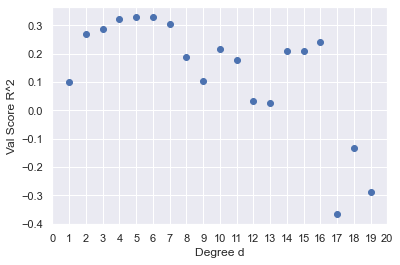

In [ ]:
# this is the plot when we cross validate for the ideal dimension d
# d against cross validation results

ydf = pd.DataFrame(data=yd)
plt.scatter(range(1,20), ydf['meanscore'])
plt.ylabel('Val Score R^2')
plt.xlabel('Degree d')
plt.xticks(np.arange(0, 21, 1))
plt.show

#find degree d with highest meanscore
best_deg = int(ydf[['meanscore']].idxmax()+1)
#get the best models of that degree d
best_reg = ydf.at[int(best_deg-1),'best_model']
best_set = ydf.at[int(best_deg-1),'best_set']

print(ydf)
print("Best Validation Score R^2:", max(ydf['meanscore']))
print('Best degree d:', best_deg)

In [ ]:
#evaluate the best model against the test-set
print("Dataset: Mixed")
print('Degree d:', best_deg)

accuracy_cf, score_cf, loss_cf = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, best_reg, best_deg)

Dataset: Mixed
Degree d: 5
TestSetScoreR^2: 0.37050639565630117
Test Set - Actual vs Predicted
   Actual  Predicted
0    20.5   9.600712
1    29.7  16.596002
2    11.3   8.566705
3     1.8  13.116419
4     9.1  19.338138
Loss Test Set 769.8115911211046
Loss Train set: 726.188824563889
Accuracy: -9.12 %.


In [ ]:
#save in the accuracy_df
dict1 = {'Model Name' : 'Poly d={0}, Mixed'.format(best_deg), 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_cf,
         'Loss': loss_cf,
         'Reg/w': best_reg }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)

Using R^2 score as a measure to choose the best d parameter does not seem to give the most accurate results. Hence, we shall use Accuracy directly to find the ideal d and Polynomial Model.

In [ ]:
#iterate through d = 1,20 to find the best d
#this time, accuracy is used as the metric
yd_acc =[]
for d in range(1,20):
    meanscore, bestscore, best_model, best_set = evaluate_d(d, CValSets_mixed, 1)
    yd_acc.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})


     meanscore  bestscore          best_model  best_set
0   -79.881163 -52.451121  LinearRegression()         3
1  -136.336970 -73.460211  LinearRegression()         3
2    10.002832  13.895186  LinearRegression()         2
3   -29.268205 -12.546583  LinearRegression()         2
4   -35.887043 -31.564450  LinearRegression()         4
5  -158.908332  -4.712984  LinearRegression()         4
6   -24.330819  -5.661350  LinearRegression()         4
7   -49.604861  -2.583062  LinearRegression()         4
8   -44.240561 -21.170130  LinearRegression()         1
9   -11.670326  -0.390986  LinearRegression()         4
10  -24.265099  16.319231  LinearRegression()         4
11  -20.693208   6.481324  LinearRegression()         1
12  -55.117337 -28.115722  LinearRegression()         2
13  -43.727929  -7.523044  LinearRegression()         4
14  -32.864062   1.592133  LinearRegression()         4
15  -74.039064  19.130489  LinearRegression()         4
16  -45.059075   2.938213  LinearRegression()   

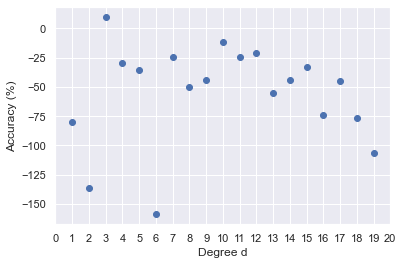

In [ ]:
# this is the plot when we cross validate for the ideal dimension d
# d against cross validation results

ydf = pd.DataFrame(data=yd_acc)
plt.scatter(range(1,20), ydf['meanscore'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Degree d')
plt.xticks(np.arange(0, 21, 1))
plt.show

best_deg = int(ydf[['meanscore']].idxmax()+1)
best_reg = ydf.at[int(best_deg-1),'best_model']
best_set = ydf.at[int(best_deg-1),'best_set']

print(ydf)
print("Best Validation Score R^2:", max(ydf['meanscore']))
print('Best degree d:', best_deg)

In [ ]:
#evaluate best model here against test set
print("Dataset: Mixed")
print('Degree d:', best_deg)

accuracy_cf, score_cf, loss_cf = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, best_reg, best_deg)

Dataset: Mixed
Degree d: 3
TestSetScoreR^2: 0.3347275332604368
Test Set - Actual vs Predicted
   Actual  Predicted
0    20.5   9.489707
1    29.7  17.475592
2    11.3  10.318189
3     1.8  15.285831
4     9.1  13.754303
Loss Test Set 813.565781472537
Loss Train set: 774.4285017938346
Accuracy: 11.3 %.


In [ ]:
#save the model
dict1 = {'Model Name' : 'Poly d={0}, Mixed'.format(best_deg), 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_cf,
         'Loss': loss_cf,
         'Reg/w': best_reg }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)

Dataset: Mixed


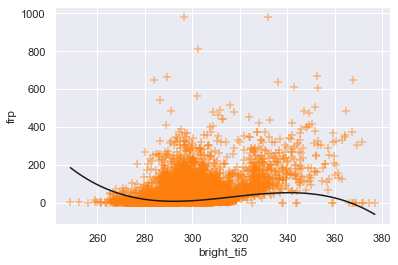

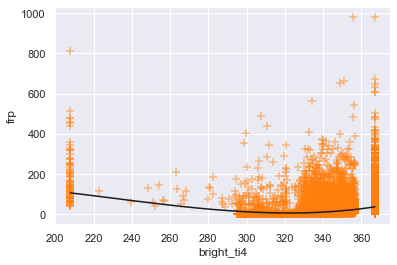

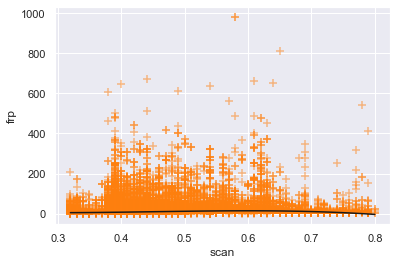

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualize the regression line one variable at a time, holding the others constant at their mean value

def polyviz_withmodel(data_xs, data_y, reg_train, d):
    #calculate mean for each x feature
    meancol = data_xs.mean(axis=0).to_frame().transpose()
    for column in data_xs:
        #for scatter plot
        x= data_xs[column]
        y= data_y  
        
        #for model line
        n_line = 100
        x_pred_line = np.linspace(min(x),max(x),n_line)
        X_pred = pd.DataFrame(np.repeat(meancol.values,n_line,axis=0),columns = meancol.columns)
        X_pred[column] = x_pred_line
        poly_reg = PolynomialFeatures(degree=d)
        X_pred_poly = poly_reg.fit_transform(X_pred)
        
        y_pred = reg_train.predict(X_pred_poly)
        #print(X_pred)
        plt.plot(x_pred_line,y_pred, c= 'k') 

        plt.scatter(x, y, s=60, c='tab:orange', marker='+', alpha = 0.5)
        plt.ylabel('frp')
        plt.xlabel(column) 
        plt.show() 
        plt.clf()

print("Dataset: Mixed")
polyviz_withmodel(data_xs_mixed, data_y_mixed, best_reg, best_deg)

## 5.4 | Random Forest/Decision Tree

Using Random Forest Model to predict frp from the x variables given. Random Forest explanation is explained in section 4.3.2, where we use the random forest to evaluate feature importance.

Sources:
- Implemented using [Random Forest in Python](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
typeofmodel = "Random Forest"
from sklearn.ensemble import RandomForestRegressor

def rforest(X_train,y_train):
    ##convert to numpy to use with randomforest
    X_trainn = X_train.values
    y_trainn = y_train.values.reshape(-1,)
    # Instantiate model with 20 decision trees, 20 decision trees upon manual testing is sufficient.
    rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
    # Train the model on training data
    rf.fit(X_trainn, y_trainn)

    print("Model Score (R^2):", rf.score(X_trainn, y_trainn))
    return rf

print("Dataset: Mixed")
reg_train_mixed = rforest(X_train_mixed, y_train_mixed)

print("")
print("Dataset: Binned")
reg_train_binned = rforest(X_train_binned, y_train_binned)

Dataset: Mixed
Model Score (R^2): 0.8636979623717466

Dataset: Binned
Model Score (R^2): 0.19959391450121367


In [ ]:
##Evaluation of Model Against Test set

def rfevaluation(X_train, y_train, X_test, y_test, reg):
    ##convert to numpy to use with randomforest
    X_train = X_train.values
    y_train = y_train.values.reshape(-1,)
    X_test = X_test.values
    y_test = y_test.values.reshape(-1,)

    #Test Set
    y_pred = reg.predict(X_test)

    #Print Dataframe Actual v.s. Predicted, Test
    df = pd.DataFrame(data=np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1)),axis=1), columns=["Actual","Predicted"])
    print("Test Set - Actual vs Predicted")
    print (df[:5])

    #Calculate Losses 
    #Loss Test Set
    Loss_test = loss_mse(y_test, y_pred)
    print("Loss Test Set", Loss_test)

    #Loss Train Set
    y_pred_train = reg.predict(X_train)
    Loss_train = loss_mse(y_train, y_pred_train)
    print("Loss Train set:", Loss_train)

    #Calculate percent error and accuracy (Test)
    MAPE = mape (y_test, y_pred)
    Accuracy = accuracy(y_test, y_pred)
    print('Accuracy:', round(Accuracy, 2), '%.')

    return Accuracy, MAPE, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, mape_mixed, loss_mixed = rfevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed)

print("")
#Dataset, Binned
print("Dataset: Binned")
accuracy_binned, mape_binned, loss_binned = rfevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned)

Dataset: Mixed
Test Set - Actual vs Predicted
   Actual  Predicted
0    20.5      6.315
1    29.7     11.875
2    11.3      4.045
3     1.8     24.490
4     9.1     10.185
Loss Test Set 886.4565910082923
Loss Train set: 150.2683608402792
Accuracy: 32.43 %.

Dataset: Binned
Test Set - Actual vs Predicted
   Actual  Predicted
0     1.2   5.041542
1    19.2   8.129750
2     2.8   4.356429
3     6.0   8.360131
4     9.1   7.709040
Loss Test Set 1308.8693557140225
Loss Train set: 858.6815043990771
Accuracy: 9.08 %.


In [ ]:
#store the model accuracies
dict2 = {'Model Name' : 'Random Forest, Mixed', 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_mixed,
         'Loss': loss_mixed,
         'Reg/w': reg_train_mixed }


df_accuracy = df_accuracy.append(dict2, ignore_index = True)

In [ ]:
dict3 = {'Model Name' : 'Random Forest, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned,
         'Loss': loss_binned,
         'Reg/w': reg_train_binned }


df_accuracy = df_accuracy.append(dict3, ignore_index = True)

In [ ]:
df_accuracy

,Model Name,DataSet,Type of Model,X_features,y_target,Accuracy,Loss,Reg/w
0,"Linear, Mixed",Mixed,Linear,"[bright_ti5, bright_ti4, scan]",[frp],-63.377186,1.072200e+03,LinearRegression()
1,"Linear, Binned",Binned,Linear,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],4.530438,1.189650e+03,LinearRegression()
2,"Poly d=1, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],4.551825,1.189479e+03,LinearRegression()
3,"Poly d=2, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],-5.697704,3.482954e+20,LinearRegression()
4,"Poly d=5, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],-9.119305,7.698116e+02,LinearRegression()
5,"Poly d=3, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],11.303454,8.135658e+02,LinearRegression()
6,"Random Forest, Mixed",Mixed,Random Forest,"[bright_ti5, bright_ti4, scan]",[frp],32.429715,8.864566e+02,"(DecisionTreeRegressor(max_features='auto', ra..."
7,"Random Forest, Binned",Binned,Random Forest,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],9.077589,1.308869e+03,"(DecisionTreeRegressor(max_features='auto', ra..."


Dataset: Mixed


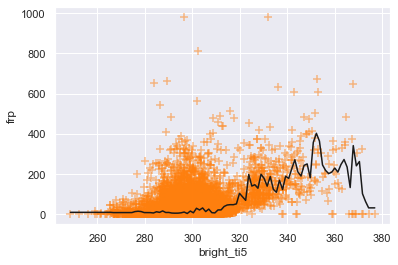

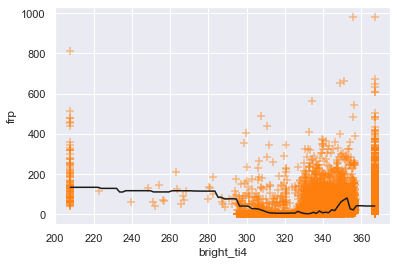

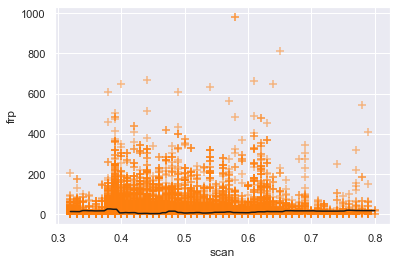

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualization of random forest 
#Model plotted against each feature xn, while the other features are held constant at their mean values
def rfviz_withmodel(data_xs, data_y, reg_train):
    i = 0
    meancol = data_xs.mean(axis=0).to_frame().transpose()
    for column in data_xs:
        #for scatter plot
        x= data_xs[column]
        y= data_y  
        
        #for model line
        n_line = 100
        x_pred_line = np.linspace(min(x),max(x),n_line)
        X_pred = pd.DataFrame(np.repeat(meancol.values,n_line,axis=0),columns = meancol.columns)
        X_pred[column] = x_pred_line
        y_pred = reg_train.predict(X_pred)
        #print(X_pred)
        plt.plot(x_pred_line,y_pred, c= 'k') 

        plt.scatter(x, y, s=60, c='tab:orange', marker='+', alpha = 0.5)
        plt.ylabel('frp')
        plt.xlabel(column) 
        plt.show() 
        i += 1
        plt.clf()

print("Dataset: Mixed")
rfviz_withmodel(data_xs_mixed, data_y_mixed, reg_train_mixed)

# 6 | Comparison between Models
In this section, we shall compare the predictive models that we have created for frp and conclude with our results.


In [ ]:
df_accuracy.drop_duplicates(subset='Model Name', inplace = True)
df_accuracy

,Model Name,DataSet,Type of Model,X_features,y_target,Accuracy,Loss,Reg/w
0,"Linear, Mixed",Mixed,Linear,"[bright_ti5, bright_ti4, scan]",[frp],-63.377186,1.072200e+03,LinearRegression()
1,"Linear, Binned",Binned,Linear,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],4.530438,1.189650e+03,LinearRegression()
2,"Poly d=1, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],4.551825,1.189479e+03,LinearRegression()
3,"Poly d=2, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],-5.697704,3.482954e+20,LinearRegression()
4,"Poly d=5, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],-9.119305,7.698116e+02,LinearRegression()
5,"Poly d=3, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],11.303454,8.135658e+02,LinearRegression()
6,"Random Forest, Mixed",Mixed,Random Forest,"[bright_ti5, bright_ti4, scan]",[frp],32.429715,8.864566e+02,"(DecisionTreeRegressor(max_features='auto', ra..."
7,"Random Forest, Binned",Binned,Random Forest,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],9.077589,1.308869e+03,"(DecisionTreeRegressor(max_features='auto', ra..."


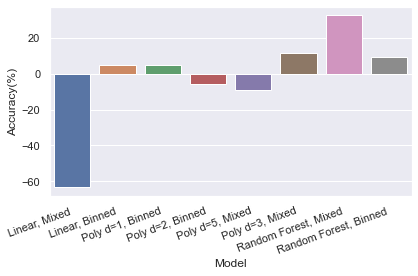

In [ ]:
ax = sns.barplot(data= df_accuracy, x = 'Model Name', y = 'Accuracy')

ax.set(xlabel='Model', ylabel = 'Accuracy(%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.tight_layout()
plt.show()

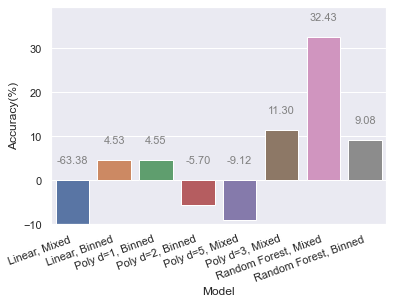

In [ ]:
#zoomed in graph
ax = sns.barplot(data= df_accuracy, x = 'Model Name', y = 'Accuracy')

ax.set(ylim=(-10, max(df_accuracy['Accuracy'])+7))
ax.set(xlabel='Model', ylabel = 'Accuracy(%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

#ax=g
#annotate axis = seaborn axis
for p in ax.patches:
    if(p.get_height() >0):
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
    else:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., 0),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')          
_ = ax #To make space for the annotations

plt.show()

Random Forest for the mixed dataset without binning the continuous variables into binary variables has the highest accuracy. From the visualizations, we can see that random forest is able to capture more the the complexity of the shape of the relation between frp and the x features selected. Without binning the variables, more details of the continuous data can be used to inform the frp values.

Interestingly, the binary variables performed better for the linear regression curve than the continuous variables. The presence of more features (though less detailed), might have allowed it to fit better to the datapoints. Though we expect that the linear regression and the poly regression with degree d =1 for the binned dataset to have the same accuracy, there are slight differences probably due to rounding.

The best models in terms of accuracy are:*
1. Random Forest, Mixed Dataset
2. Polynomial Regression, d=3, Mixed Dataset
2. Random Forest, Binned Dataset

Overall, we might want to use other features or a better dataset for higher accuracy for our model.

**Values subject to change due to the dynamic dataset*